# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [22]:
cities

['cidreira',
 'fortuna',
 'port elizabeth',
 'ayutla',
 'puerto ayora',
 'abalak',
 'kamenka',
 'dormidontovka',
 'bud',
 'qaanaaq',
 'rikitea',
 'el tarra',
 'laguna',
 'chuy',
 'ushuaia',
 'east london',
 'mackenzie',
 'pisco',
 'khonuu',
 'norman wells',
 'saint-pierre',
 'kodiak',
 'port alfred',
 'bredasdorp',
 'banepa',
 'bacolod',
 'bolshiye kaybitsy',
 'clermont',
 'busselton',
 'jamestown',
 'hilo',
 'ribeira grande',
 'punta arenas',
 'albany',
 'mnogovershinnyy',
 'grindavik',
 'nikolskoye',
 'saldanha',
 'souillac',
 'hobart',
 'avarua',
 'leningradskiy',
 'taolanaro',
 'vanavara',
 'skjervoy',
 'saint-philippe',
 'torbay',
 'hailar',
 'pingliang',
 'faya',
 'san quintin',
 'hithadhoo',
 'belushya guba',
 'lompoc',
 'upernavik',
 'sotuta',
 'tessalit',
 'tabiauea',
 'sujiatun',
 'kapaa',
 'saint george',
 'coos bay',
 'cabo san lucas',
 'illoqqortoormiut',
 'mataura',
 'lebu',
 'vaini',
 'amderma',
 'vaitape',
 'ukiah',
 'avera',
 'zhigansk',
 'mahebourg',
 'paamiut',
 'tia

In [23]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=498d2ca43d42d2d12a59be4be9d74a54&units=metric&q=


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
#cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York","Vaitupu" ,"Seattle", "Dallas", "Taipei"]
# set up lists to hold reponse info
lat = []
lon = []
mtem = []
hum = []
clo = []
win = []
cou = []
dat = []
cit=[]
i=1
print("Beginning data Retrieval")
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        mtem.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        clo.append(response['clouds']['all'])
        win.append(response['wind']['speed'])
        cou.append(response['sys']['country'])
        dat.append(datetime.utcfromtimestamp(response['dt']).strftime('%Y-%m-%d %H:%M:%S'))
        cit.append(response['name'])
        print("Processing Record", i ," ", city)
        i=i+1
    except KeyError:
        print("City not found. Skipping", i,city)

Beginning data Retrieval
Processing Record 1   cidreira
Processing Record 2   fortuna
Processing Record 3   port elizabeth
Processing Record 4   ayutla
Processing Record 5   puerto ayora
Processing Record 6   abalak
Processing Record 7   kamenka
Processing Record 8   dormidontovka
Processing Record 9   bud
Processing Record 10   qaanaaq
Processing Record 11   rikitea
Processing Record 12   el tarra
Processing Record 13   laguna
Processing Record 14   chuy
Processing Record 15   ushuaia
Processing Record 16   east london
Processing Record 17   mackenzie
Processing Record 18   pisco
City not found. Skipping 19 khonuu
Processing Record 19   norman wells
Processing Record 20   saint-pierre
Processing Record 21   kodiak
Processing Record 22   port alfred
Processing Record 23   bredasdorp
Processing Record 24   banepa
Processing Record 25   bacolod
City not found. Skipping 26 bolshiye kaybitsy
Processing Record 26   clermont
Processing Record 27   busselton
Processing Record 28   jamestown
P

Processing Record 224   lodja
Processing Record 225   lavrentiya
Processing Record 226   plouzane
Processing Record 227   doha
Processing Record 228   naryan-mar
Processing Record 229   qasigiannguit
Processing Record 230   te anau
Processing Record 231   nyurba
City not found. Skipping 232 lolua
Processing Record 232   otradnoye
Processing Record 233   mount gambier
Processing Record 234   talnakh
Processing Record 235   blackwater
Processing Record 236   olafsvik
Processing Record 237   nanakuli
Processing Record 238   otane
Processing Record 239   bardsir
Processing Record 240   rabo de peixe
Processing Record 241   zyryanka
Processing Record 242   san ramon
Processing Record 243   pevek
Processing Record 244   gravdal
Processing Record 245   yerbogachen
Processing Record 246   ahipara
Processing Record 247   shar
Processing Record 248   elban
Processing Record 249   tautira
City not found. Skipping 250 kerki
Processing Record 250   hambantota
Processing Record 251   jawhar
Processi

Processing Record 449   kilindoni
Processing Record 450   mago
Processing Record 451   linguere
Processing Record 452   westport
Processing Record 453   tutayev
City not found. Skipping 454 armacao dos buzios
Processing Record 454   whitehorse
Processing Record 455   pierre
Processing Record 456   oktyabrskiy
Processing Record 457   kalabo
Processing Record 458   meulaboh
Processing Record 459   bousso
Processing Record 460   bosaso
Processing Record 461   dondo
City not found. Skipping 462 samusu
Processing Record 462   neiafu
Processing Record 463   gladstone
Processing Record 464   phan thiet
Processing Record 465   turbana
Processing Record 466   tekeli
Processing Record 467   pahrump
Processing Record 468   xai-xai
Processing Record 469   minas de barroteran
Processing Record 470   natal
Processing Record 471   road town
Processing Record 472   mbandaka
Processing Record 473   nueva concepcion
Processing Record 474   dingle
Processing Record 475   nayoro
Processing Record 476   os

In [26]:
print(len(cit))

572


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cit,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": mtem,
    "Humidity": hum,
    "Cloudiness": clo,
    "Wind Speed": win,
    "Country": cou,
    "Date": dat
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("Output/cities_weather.csv", index=False)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,20.86,71,52,7.62,BR,2021-02-04 23:05:41
1,Fortuna,40.5982,-124.1573,12.78,71,1,5.14,US,2021-02-04 23:05:41
2,Port Elizabeth,-33.9180,25.5701,20.00,88,0,2.06,ZA,2021-02-04 23:05:41
3,Ayutla,20.1167,-104.3333,29.48,15,0,3.99,MX,2021-02-04 23:01:34
4,Puerto Ayora,-0.7393,-90.3518,30.00,62,0,5.66,EC,2021-02-04 23:04:03
...,...,...,...,...,...,...,...,...,...
567,Bahía Blanca,-38.7196,-62.2724,26.60,27,0,4.76,AR,2021-02-04 23:07:12
568,Acapulco de Juárez,16.8634,-99.8901,29.00,70,1,2.57,MX,2021-02-04 23:02:53
569,Tipitapa,12.1973,-86.0971,31.00,45,20,4.12,NI,2021-02-04 23:07:12
570,Chachapoyas,-6.2317,-77.8690,15.54,87,97,1.29,PE,2021-02-04 23:07:12


In [29]:
#display stadistics summary
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,20.398740,16.370906,10.435122,72.844406,52.711538,3.709598
std,32.273896,90.763684,17.345464,19.907806,38.959169,2.703428
min,-54.800000,-175.200000,-44.410000,13.000000,0.000000,0.100000
25%,-3.846275,-65.254850,1.000000,63.000000,8.750000,1.690000
50%,24.275250,24.439000,16.135000,78.000000,57.500000,3.090000
75%,47.629175,96.384050,24.172500,88.000000,90.000000,5.032500
max,77.484000,178.416700,34.000000,100.000000,100.000000,17.210000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
cities_hum_less100=weather_data.loc[weather_data['Humidity']<101]
cities_hum_less100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,20.86,71,52,7.62,BR,2021-02-04 23:05:41
1,Fortuna,40.5982,-124.1573,12.78,71,1,5.14,US,2021-02-04 23:05:41
2,Port Elizabeth,-33.9180,25.5701,20.00,88,0,2.06,ZA,2021-02-04 23:05:41
3,Ayutla,20.1167,-104.3333,29.48,15,0,3.99,MX,2021-02-04 23:01:34
4,Puerto Ayora,-0.7393,-90.3518,30.00,62,0,5.66,EC,2021-02-04 23:04:03


In [10]:
#  Get the indices of cities that have humidity over 100%.
over100=[]
#over100 = next(iter((weather_data['Humidity']>100).index), 'no match')
over100

[]

In [31]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data= weather_data.drop(over100, axis=0, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,20.86,71,52,7.62,BR,2021-02-04 23:05:41
1,Fortuna,40.5982,-124.1573,12.78,71,1,5.14,US,2021-02-04 23:05:41
2,Port Elizabeth,-33.9180,25.5701,20.00,88,0,2.06,ZA,2021-02-04 23:05:41
3,Ayutla,20.1167,-104.3333,29.48,15,0,3.99,MX,2021-02-04 23:01:34
4,Puerto Ayora,-0.7393,-90.3518,30.00,62,0,5.66,EC,2021-02-04 23:04:03
...,...,...,...,...,...,...,...,...,...
567,Bahía Blanca,-38.7196,-62.2724,26.60,27,0,4.76,AR,2021-02-04 23:07:12
568,Acapulco de Juárez,16.8634,-99.8901,29.00,70,1,2.57,MX,2021-02-04 23:02:53
569,Tipitapa,12.1973,-86.0971,31.00,45,20,4.12,NI,2021-02-04 23:07:12
570,Chachapoyas,-6.2317,-77.8690,15.54,87,97,1.29,PE,2021-02-04 23:07:12


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

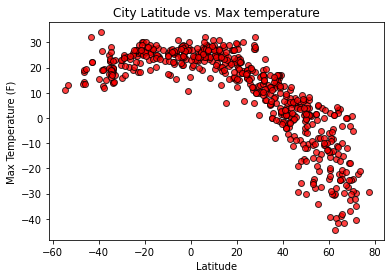

In [32]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("Images/latvsmmaxtemp.png")
plt.show()

## Latitude vs. Humidity Plot

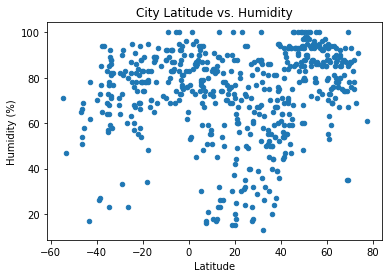

In [33]:
clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", title="City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("Images/latvshum.png")
plt.show()

## Latitude vs. Cloudiness Plot

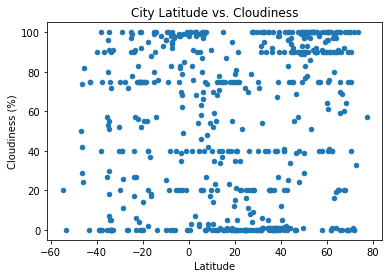

In [34]:
clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", title="City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("Images/latvsclou.png")
plt.show()

## Latitude vs. Wind Speed Plot

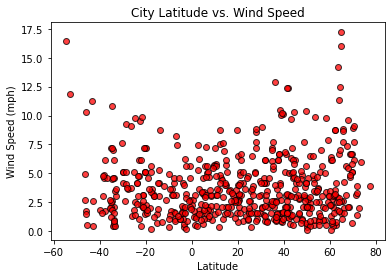

In [35]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Images/latvswin.png")
plt.show()

## Linear Regression

In [36]:
northern_hemi_data=clean_city_data.loc[clean_city_data['Lat']>=0]
northern_hemi_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Fortuna,40.5982,-124.1573,12.78,71,1,5.14,US,2021-02-04 23:05:41
3,Ayutla,20.1167,-104.3333,29.48,15,0,3.99,MX,2021-02-04 23:01:34
5,Abalak,58.1286,68.5944,-10.67,96,100,3.38,RU,2021-02-04 23:05:41
6,Kamenka,51.3223,42.7678,3.89,98,100,6.51,RU,2021-02-04 23:05:41
7,Dormidontovka,47.7702,134.9076,-25.62,83,24,4.82,RU,2021-02-04 23:05:42
...,...,...,...,...,...,...,...,...,...
563,Naze,28.3667,129.4833,10.00,87,20,1.54,JP,2021-02-04 23:04:59
564,Dryden,49.7833,-92.7503,-12.00,79,90,5.66,CA,2021-02-04 23:07:12
566,‘Āhuimanu,21.4447,-157.8378,22.00,60,75,6.17,US,2021-02-04 23:07:12
568,Acapulco de Juárez,16.8634,-99.8901,29.00,70,1,2.57,MX,2021-02-04 23:02:53


In [37]:
southern_hemi_data=clean_city_data.loc[clean_city_data['Lat']<0]
southern_hemi_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,20.86,71,52,7.62,BR,2021-02-04 23:05:41
2,Port Elizabeth,-33.9180,25.5701,20.00,88,0,2.06,ZA,2021-02-04 23:05:41
4,Puerto Ayora,-0.7393,-90.3518,30.00,62,0,5.66,EC,2021-02-04 23:04:03
10,Rikitea,-23.1203,-134.9692,26.06,67,91,4.77,PF,2021-02-04 23:05:42
13,Chui,-33.6971,-53.4616,18.22,81,72,6.11,UY,2021-02-04 23:05:42
...,...,...,...,...,...,...,...,...,...
559,Chuka,-0.3332,37.6459,16.34,65,0,1.88,KE,2021-02-04 23:07:11
565,Alta Floresta,-9.8756,-56.0861,24.50,88,96,0.31,BR,2021-02-04 23:07:12
567,Bahía Blanca,-38.7196,-62.2724,26.60,27,0,4.76,AR,2021-02-04 23:07:12
570,Chachapoyas,-6.2317,-77.8690,15.54,87,97,1.29,PE,2021-02-04 23:07:12


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7606736427186179


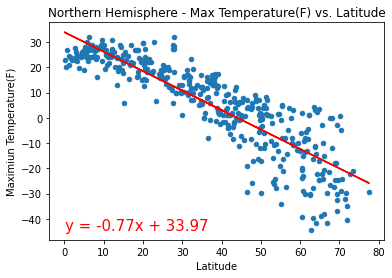

In [55]:
northern_hemi_data.plot(kind="scatter", x="Lat", y="Max Temp", title="Northern Hemisphere - Max Temperature(F) vs. Latitude")
# Add the linear regression equation and line to plot
x_values = northern_hemi_data['Lat']
y_values = northern_hemi_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#take values to print the line eq
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/norlatvsmaxtem.png")
plt.ylabel("Maximiun Temperature(F)")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.22844631382811362


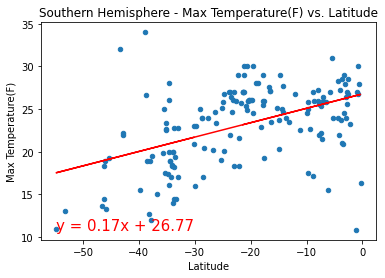

In [56]:
southern_hemi_data.plot(kind="scatter", x="Lat", y="Max Temp", title="Southern Hemisphere - Max Temperature(F) vs. Latitude")
# Add the linear regression equation and line to plot
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/soulatvsmaxtem.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08638904441482084


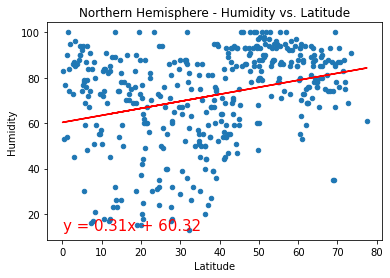

In [57]:
northern_hemi_data.plot(kind="scatter", x="Lat", y="Humidity", title="Northern Hemisphere - Humidity vs. Latitude")
# Add the linear regression equation and line to plot
x_values = northern_hemi_data['Lat']
y_values = northern_hemi_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#take values to print the line eq
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/norlatvshum.png")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16315763043392809


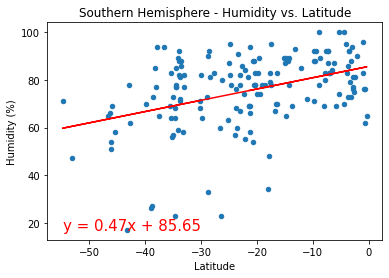

In [58]:
southern_hemi_data.plot(kind="scatter", x="Lat", y="Humidity", title="Southern Hemisphere - Humidity vs. Latitude")
# Add the linear regression equation and line to plot
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/soulatvshum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05042997245399286


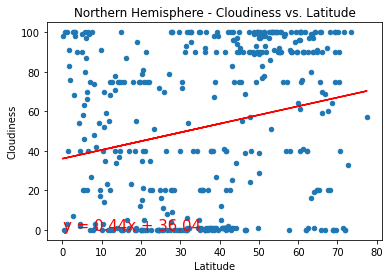

In [59]:
northern_hemi_data.plot(kind="scatter", x="Lat", y="Cloudiness", title="Northern Hemisphere - Cloudiness vs. Latitude")

# Add the linear regression equation and line to plot
x_values = northern_hemi_data['Lat']
y_values = northern_hemi_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/norlatvsclou.png")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04730545258400186


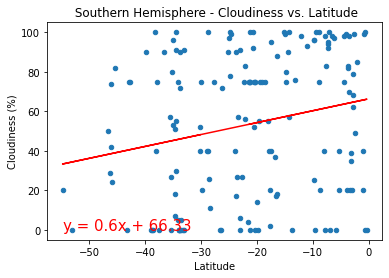

In [60]:
southern_hemi_data.plot(kind="scatter", x="Lat", y="Cloudiness", title=" Southern Hemisphere - Cloudiness vs. Latitude")

# Add the linear regression equation and line to plot
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/soulatvsclou.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02085688771523151


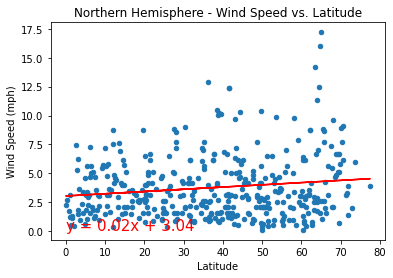

In [61]:
northern_hemi_data.plot(kind="scatter", x="Lat", y="Wind Speed", title="Northern Hemisphere - Wind Speed vs. Latitude")
# Add the linear regression equation and line to plot
x_values = northern_hemi_data['Lat']
y_values = northern_hemi_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/norlatvswin.png")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0703624038885258


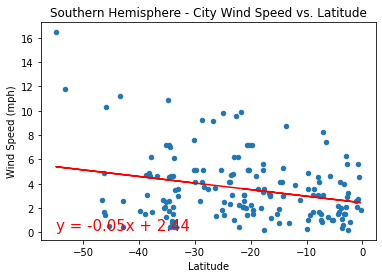

In [65]:
southern_hemi_data.plot(kind="scatter", x="Lat", y="Wind Speed", title="Southern Hemisphere - City Wind Speed vs. Latitude")
# Add the linear regression equation and line to plot
x_values = southern_hemi_data['Lat']
y_values = southern_hemi_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
x=x_values.min()
y=y_values.min()
plt.annotate(line_eq,(x,y),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
#save image
plt.savefig("Images/soulatvswin.png")
plt.show()